#2.1 Linear Regression with Scikit-learn on Linnerud dataset

In [164]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [165]:
data, target = sklearn.datasets.load_linnerud(return_X_y=True)
print(data.shape)
print(target.shape)

situps = data[:,1]
print(situps.shape)
waist = target[:,1]
print(waist.shape)

(20, 3)
(20, 3)
(20,)
(20,)


In [166]:
model = sklearn.linear_model.LinearRegression()
situps_train, situps_test, waist_train, waist_test = sklearn.model_selection.train_test_split(situps, waist, test_size=0.33)
situps_train = situps_train.reshape(-1,1)
situps_test = situps_test.reshape(-1,1)
model.fit(situps_train, waist_train)
waist_pred = model.predict(situps_test)





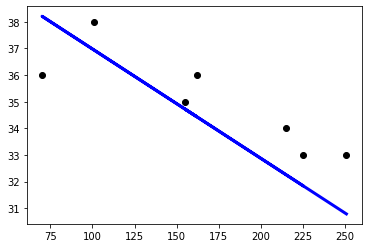

In [167]:
plt.scatter(situps_test, waist_test, color='black')
plt.plot(situps_test, waist_pred, color='blue', linewidth=3)

plt.show()

#2.2 Logistic Regression 

#2.3 Digit Classification with Artificial Neural Networks